### Notebook for creating stock dataset with some testing code

In [1]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 935.2 kB/s eta 0:00:00MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 20.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 35.4 MB/s eta 0:00:00


In [1]:
import yfinance as yf

In [2]:
msft = yf.Ticker("ORCL")

# get all stock info
msft.info

{'address1': '2300 Oracle Way',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78741',
 'country': 'United States',
 'phone': '737 867 1000',
 'website': 'https://www.oracle.com',
 'industry': 'Software—Infrastructure',
 'industryDisp': 'Software—Infrastructure',
 'sector': 'Technology',
 'longBusinessSummary': "Oracle Corporation offers products and services that address enterprise information technology environments worldwide. Its Oracle cloud software as a service offering include various cloud software applications, including Oracle Fusion cloud enterprise resource planning (ERP), Oracle Fusion cloud enterprise performance management, Oracle Fusion cloud supply chain and manufacturing management, Oracle Fusion cloud human capital management, Oracle Advertising, and NetSuite applications suite, as well as Oracle Fusion Sales, Service, and Marketing. The company also offers cloud-based industry solutions for various industries; Oracle application licenses; and Oracle license support ser

In [110]:
# get historical market data
df = msft.history(period="13y")

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
df.index[100].strftime("%Y-%m")

'2013-10'

In [121]:
df["shortDate"] = df.index.strftime("%m-%y")
df['date'] = df.index
df.groupby([df.index.year, df.index.month]).first()
# df.to_csv("ORCL.csv")

Open       High        Low      Close    Volume  Dividends  Stock Splits shortDate                      date
Date Date                                                                                                                   
2010 6     18.717537  19.068178  18.492125  18.533869  32336200        0.0           0.0     06-10 2010-06-01 00:00:00-04:00
     7     17.916064  18.099734  17.732396  17.991201  38318200        0.0           0.0     07-10 2010-07-01 00:00:00-04:00
     8     19.970808  20.405864  19.845310  20.322201  26652000        0.0           0.0     08-10 2010-08-02 00:00:00-04:00
     9     18.531768  18.950092  18.489936  18.924994  29085400        0.0           0.0     09-10 2010-09-01 00:00:00-04:00
     10    22.740104  23.099863  22.706637  22.790302  33690400        0.0           0.0     10-10 2010-10-01 00:00:00-04:00
...              ...        ...        ...        ...       ...        ...           ...       ...                       ...
2023 1     81.819296  83.178481  81.610954  83.059433   8997500        0.0           0.0     01-23 2023-01-03 00:00:00-05:00
     2     88.001490  90.271981  87.842153  89.674484   6141300        0.0           0.0     02-23 2023-02-01 00:00:00-05:00
     3     86.537620  86.846325  85.631411  85.979950   5119800        0.0           0.0     03-23 2023-03-01 00:00:00-05:00
     4     91.994764  93.608011  91.705973  93.528343   8410900        0.0           0.0     04-23 2023-04-03 00:00:00-04:00
     5     94.800003  95.730003  94.699997  94.870003   5459800        0.0           0.0     05-23 2023-05-01 00:00:00-04:00

[156 rows x 9 columns]

In [20]:
cc= df[df.index.day == 1][["Open"]].rename(columns={"Open": "AAPL"})

In [78]:
oo = pd.merge(cc, ii, left_index=True, right_index=True)

In [79]:
oo

,AAPL,AAPLaa
Date,,
2010-06-01 00:00:00-04:00,7.882918,7.882918
2010-07-01 00:00:00-04:00,7.719302,7.719302
2010-09-01 00:00:00-04:00,7.511973,7.511973
2010-10-01 00:00:00-04:00,8.686110,8.686110
2010-11-01 00:00:00-04:00,9.173916,9.173916
...,...,...
2022-11-01 00:00:00-04:00,154.373620,154.373620
2022-12-01 00:00:00-05:00,147.779648,147.779648
2023-02-01 00:00:00-05:00,143.551954,143.551954


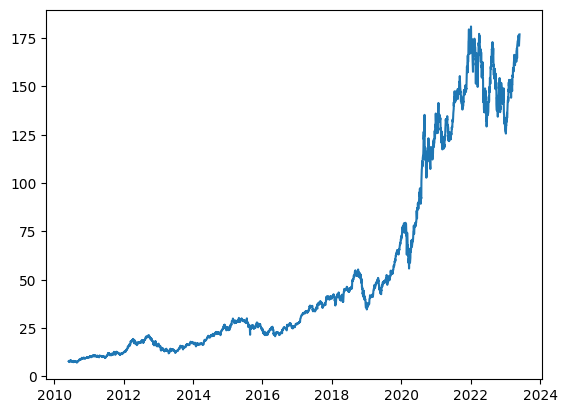

In [30]:
plt.plot(df["Open"])

In [6]:
import enum

class Sectors(enum.Enum):
    AUTOMOTIVE = enum.auto()
    TECHNOLOGY = enum.auto()
    BANKING = enum.auto()
    HEALTHCARE = enum.auto()
    ENERGY = enum.auto()
    FOOD = enum.auto()
    TELECOMUNICATION = enum.auto()
    SOFTWARE = enum.auto()
    MEDIA = enum.auto()
    RETAIL = enum.auto()
    

chosen_stocks: dict[Sectors, list[str]] = {
    Sectors.AUTOMOTIVE: [
        "VWAGY", # VOLKSWAGEN
        "BMW.DE", # Bayerische Motoren Werke AG
        "TM", # Toyota Motor Corporation
        "GM", # General Motors Company
        "F", # Ford Motor Company
    ],
    Sectors.TECHNOLOGY: [
        "SMSN.IL", # samsung
        "AAPL", # apple
        "SONY", # sony
        "INTC", # intel
        "NVDA", # nvidia
    ],
    Sectors.BANKING: [
        "JPM", # JPMorgan Chase & Co
        "BAC", # Bank of America Corporation
        "C", # Citigroup Inc.
        "SAN", # Banco Santander
        "HSBC", # HSBC Holdings
    ],
    Sectors.HEALTHCARE: [
        "JNJ", # Johnson & Johnson
        "PFE", # Pfizer Inc.
        "CVS", # CVS Health Corporation
        "UNH", # UnitedHealth Group Incorporated
        "BAYN.DE", # Bayer
    ],
    Sectors.ENERGY: [
        "XOM", # Exxon Mobil Corporation
        "CVX", # Chevron Corporation
        "GBX", # Shell
        "BP", # BP p.l.c.
        "TTE", # TotalEnergies SE
    ],
    Sectors.FOOD: [
        "KO", # The Coca-Cola Company
        "MCD", # McDonald's Corporation
        "NSRGF", # Nestle S.A.
        "PEP", # PepsiCo, Inc.
        "MDLZ", # Mondelez International
    ],
    Sectors.TELECOMUNICATION: [
        "T", # AT&T Inc.
        "VZ", # Verizon Communications Inc.
        "TMUS", # T-Mobile US, Inc.
        "VOD", # Vodafone Group Plc
        "NOK", # Nokia
    ],
    Sectors.SOFTWARE: [
        "MSFT", # Microsoft
        "SAP", # SAP
        "CRM", # Salesforce
        "ORCL", # Oracle
        "IBM", # IBM
    ],
    Sectors.MEDIA: [
        "DIS", # The Walt Disney Company
        "NFLX", # Netflix, Inc.
        "NWSA", # News corporation
        "META", # Facebook
        "GOOGL", # Alphabet Inc.
    ],
    Sectors.RETAIL: [
        "AMZN", # Amazon.com, Inc.
        "WMT", # Walmart Inc.
        "TGT", # Target Corporation
        "HD", # The Home Depot, Inc.
        "COST", # Costco Wholesale Corporation
    ],
}
    

In [86]:
# get historical market data
msft = yf.Ticker("GM")
df = msft.history(period="13y")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-11-18 00:00:00-05:00,26.867174,27.627133,26.015100,26.245390,457044300,0.0,0.0
2010-11-19 00:00:00-05:00,26.214688,26.483359,25.416349,26.299126,107842000,0.0,0.0
2010-11-22 00:00:00-05:00,26.253071,26.468007,25.953694,26.160955,36650600,0.0,0.0
2010-11-23 00:00:00-05:00,26.061161,26.091867,25.477758,25.523817,31170200,0.0,0.0
2010-11-24 00:00:00-05:00,25.892275,25.946009,25.500784,25.700367,26138000,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-24 00:00:00-04:00,33.000000,33.040001,32.009998,32.279999,13357500,0.0,0.0
2023-05-25 00:00:00-04:00,32.160000,32.639999,32.130001,32.410000,10492700,0.0,0.0
2023-05-26 00:00:00-04:00,32.619999,33.490002,32.349998,33.290001,13650900,0.0,0.0


In [4]:
calculated = {}

In [8]:
import pandas as pd
from tqdm.notebook import tqdm

pd.options.display.width = 0
pd.set_option('display.expand_frame_repr', False)

def generate_stock_dataset():
    result_df=None
    l = 0
    
    for sector in tqdm(Sectors):
        for stock_name in chosen_stocks[sector]:
            print(stock_name)
            
            if stock_name not in calculated:
                ticker = yf.Ticker(stock_name)
                df = ticker.history(period="13y")
                calculated[stock_name] = df
            
            try:
                df = calculated[stock_name]
                df["shortDate"] = df.index.strftime("%Y-%m")
                
                df['date'] = df.index
                df = df.groupby([df.index.year, df.index.month]).first().sort_values(by="date")
            except AttributeError:
                print("shortcircuiting!!")

            
            df = df.set_index("shortDate")
            df = df[["Open"]]
            df = df.rename(columns={"Open": stock_name})
            
            if result_df is not None:
                result_df = pd.concat([result_df, df], axis=1)
            else:
                result_df = df
            
    return result_df
            
df = generate_stock_dataset()
df

  0%|          | 0/10 [00:00<?, ?it/s]

VWAGY
BMW.DE
TM
GM
F
SMSN.IL
AAPL
SONY
INTC
NVDA
JPM
BAC
C
SAN
HSBC
JNJ
PFE
CVS
UNH
BAYN.DE
XOM
CVX
GBX
BP
TTE
KO
MCD
NSRGF
PEP
MDLZ
T
VZ
TMUS
VOD
NOK
MSFT
SAP
CRM
ORCL
IBM
DIS
NFLX
NWSA
META
GOOGL
AMZN
WMT
TGT
HD
COST


,SONY
shortDate,
2010-06,30.270000
2010-07,26.219999
2010-08,31.950001
2010-09,28.350000
2010-10,30.799999
...,...
2023-02,88.889999
2023-03,83.900002
2023-04,90.410004


In [97]:
for n, c in calculated.items():
    print(f"{n}: {c.shape}")

VWAGY: (3273, 9)
BMW.DE: (3301, 9)
TM: (3273, 9)
GM: (3153, 9)
F: (3273, 9)
SMSN.IL: (3283, 9)
AAPL: (3273, 9)
AMD: (3273, 9)
INTC: (3273, 9)
NVDA: (3273, 9)
JPM: (3273, 9)
BAC: (3273, 9)
C: (3273, 9)
SAN: (3273, 9)
ACA: (1149, 9)
JNJ: (3273, 9)
PFE: (3273, 9)
CVS: (3273, 9)
NOVN: (1684, 9)
BAYN.DE: (3301, 9)
XOM: (3273, 9)
CVX: (3273, 9)
GBX: (3273, 9)
BP: (3273, 9)
TTE: (3273, 9)
KO: (3273, 9)
MCD: (3273, 9)
NSRGF: (3273, 9)
PEP: (3273, 9)
KHC: (1991, 9)
T: (3273, 9)
VZ: (3273, 9)
TMUS: (3273, 9)
VOD: (3273, 9)
NOK: (3273, 9)
MSFT: (3273, 9)
SAP: (3273, 9)
CRM: (3273, 9)
ORCL: (3273, 9)
IBM: (3273, 9)
DIS: (3273, 9)
NFLX: (3273, 9)
FOXA: (1064, 9)
META: (2776, 9)
GOOGL: (3273, 9)
AMZN: (3273, 9)
WMT: (3273, 9)
TGT: (3273, 9)
HD: (3273, 9)
COST: (3273, 9)


In [129]:
df.to_csv("data/stock_prices.csv")

In [137]:
import csv
from collections import defaultdict

data_dict = defaultdict(lambda: {})

with open("data/stock_prices.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        
        date = row["shortDate"]
        
        for key, value in row.items():
            if key == "shortDate":
                continue
            
            try:
                data_dict[key][date] = float(value)
            except ValueError:
                data_dict[key][date] = float("nan")
                

data_dict
    

defaultdict(<function __main__.<lambda>()>,
            {'VWAGY': {'2010-06': 6.57895036831442,
              '2010-07': 6.69450513082582,
              '2010-08': 7.36087553331256,
              '2010-09': 7.14902328979172,
              '2010-10': 8.41628139106071,
              '2010-11': 10.1265003417073,
              '2010-12': 11.0624962654558,
              '2011-01': 11.2666447421529,
              '2011-02': 11.7943489927681,
              '2011-03': 11.7481255044264,
              '2011-04': 11.8636814314332,
              '2011-05': 13.6701978329841,
              '2011-06': 13.1463453463568,
              '2011-07': 14.1632319073748,
              '2011-08': 14.3866389033989,
              '2011-09': 11.6402738793747,
              '2011-10': 9.1134644064905,
              '2011-11': 11.2011642612571,
              '2011-12': 11.647978585293,
              '2012-01': 10.9276837116176,
              '2012-02': 12.7996796045278,
              '2012-03': 13.1347895939712,
   